**Clasificadores - conceptos básicos**

*Códigos referencia del libro Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 3) -- Aurélien Géron

# Configuraciones básicas

Preparar módulos de Python:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "imagesAM", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST : "Hello world" de clasificación 

Se ordenan los datos para asegurar repetibilidad de los experimentos. Note que se ordenan por separado el conjunto de entrenamiento (primeras 60000 imágenes) y el conjunto de evaluación (las restantes 10000).

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [12]:
mnist.data.shape

(70000, 784)

In [13]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [16]:
28*28 #resolución de las imágenes

784

Saving figure some_digit_plot


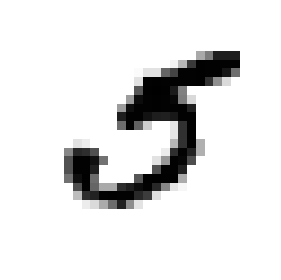

In [19]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [122]:
def plot_digit(data): #función graficar dígito
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [123]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


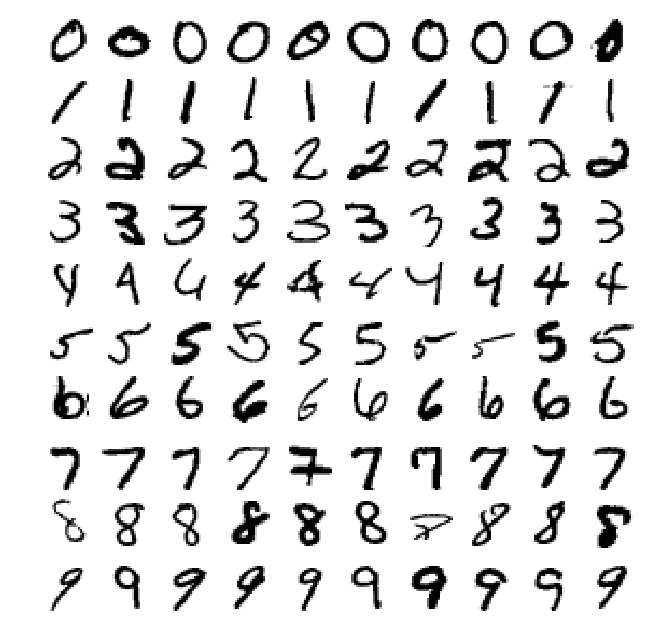

(100, 784)

In [24]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]] #concatenar a la derecha
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

np.shape(example_images)

In [12]:
y[36000] #etiqueta correspondiente

5

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #particionar train y test

In [27]:
import numpy as np

shuffle_index = np.random.permutation(60000) #permutación datos
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Ejemplo clasificador binario

In [29]:
y_train_5 = (y_train == 5) # clasificador 5 vs NO 5
y_test_5 = (y_test == 5)

**Nota**: Algunos parámetros de optimización deben definirse para evitar warnings

In [30]:
from sklearn.linear_model import SGDClassifier #clasificador lineal por gradiente

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
sgd_clf.predict([some_digit]) #clasificar dígito 5

array([ True])

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #evaluar clasificador según acierto

array([0.87175, 0.96715, 0.9369 ])

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42) #generar partición balanceada

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.87175
0.96715
0.9369


In [34]:
from sklearn.base import BaseEstimator #clase básica para construir modelos en scikitlearn
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [35]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91025, 0.9101 , 0.9086 ])

In [46]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) #genera predicción de cada muestra según su aparición en validación

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[50766,  3813],
       [  671,  4750]], dtype=int64)

In [48]:
y_train_perfect_predictions = y_train_5

In [49]:
confusion_matrix(y_train_5, y_train_perfect_predictions)
#[[TN FP][FN TP]]

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [52]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # TP/(TP+FP)

0.5547121335980381

In [53]:
recall_score(y_train_5, y_train_pred) # TP/(TP+FN)

0.876222099243682

In [54]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # 2/(1/pre + 1/rec) = TP/(TP + (FN+FP)/2)

0.6793478260869565

In [55]:
y_scores = sgd_clf.decision_function([some_digit]) #estimar score del dígito de prueba
y_scores

array([75090.39935667])

In [56]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [57]:
y_some_digit_pred

array([ True])

In [58]:
threshold = 200000 #cambiar umbral para sesgar clasificador según precisión o exahustividad
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [64]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [65]:
y_scores.shape  #revisar salida de predict según versión de scikitlearn

(60000,)

In [66]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) #estimar precisión y exahustividad variando los umbrales

Saving figure precision_recall_vs_threshold_plot


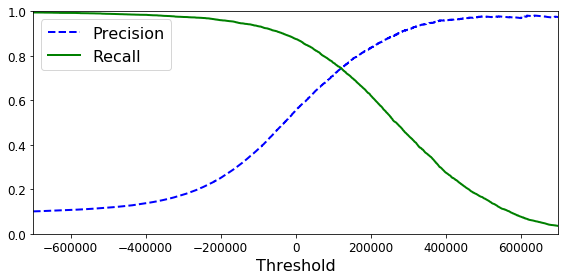

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [69]:
(y_train_pred == (y_scores > 0)).all() #revisar si todos cumplen condición
#por defecto scikitlearn evalua clasificador con umbral en 0

True

In [73]:
y_train_pred_90 = (y_scores > 70000) # nueva frontera cambiando el umbral de 0 a 70000

In [74]:
precision_score(y_train_5, y_train_pred_90)

0.6681985294117647

In [75]:
recall_score(y_train_5, y_train_pred_90) # por nuevo umbral se ajusta exahustividad

0.8046485888212507

Saving figure precision_vs_recall_plot


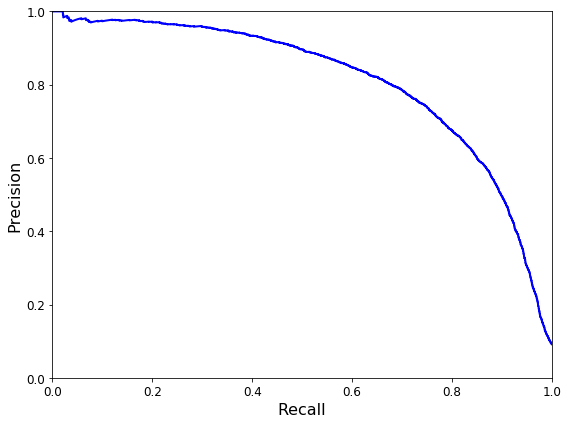

In [76]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# Curva ROC: reciever operating characteristic
Característica Operativa del Receptor

In [82]:
from sklearn.metrics import roc_curve
#matriz confusión = #[[TN FP][FN TP]]
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # Fpr = FP/N -> 1 - especificidad , Tpr = TP/(TP+FN) -> exahustividad (recall, sensibilidad)
#especificidad = TN/(TN+FP)


array([1129646.83463613,  775216.34718599,  769140.56646211,
        723908.29365335,  709589.41644501])

Saving figure roc_curve_plot


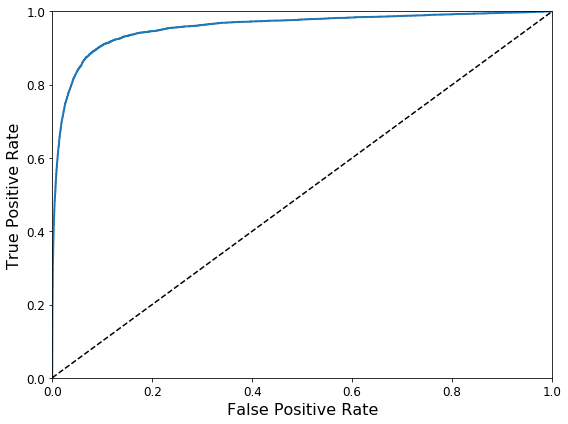

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)#clasificador perfecto AUC = 1; clasificador aleatorio AUC = 0.5

0.9563121591738021

In [86]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [87]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


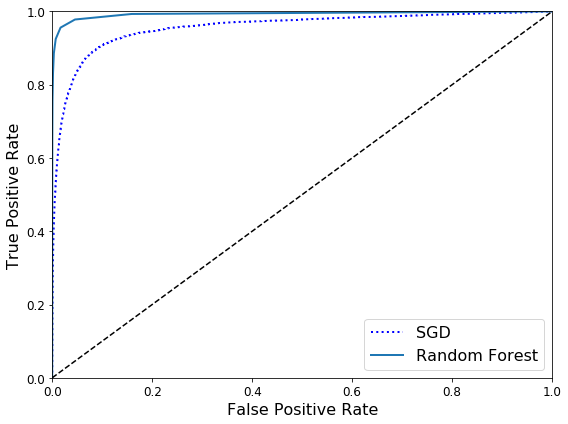

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

Se recomienda usar la curva precisión vs exahustividad cuando la clase positiva es escasa o cuando es más importante en la aplicación evitar los falsos positivos que los falsos negativos, y la curva ROC en caso contrario (es más importante evitar los falsos negativos que los falsos positivos, ej. problemas de salud).

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.992830497450426

In [92]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9806437581557199

In [94]:
recall_score(y_train_5, y_train_pred_forest) #pocos 5 recall = TP/(TP+FN), de los pocos 5s se equivoco, se sesga a clasificar no 5

0.831765356945213

# Clasificación multiclase

In [98]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit]) # si el clasificador es netamente binario aplica estrategia one vs all, 
#a excepción de las svm que aplica one vs one para evitar costo computacional

array([5], dtype=int8)

In [99]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-182692.06194962, -401178.58857685, -342030.93878097,
         -89340.70455522, -512749.92629109,   75090.39935667,
        -674198.61305684, -310540.47612933, -572399.68212808,
        -387233.04985949]])

In [100]:
np.argmax(some_digit_scores) # máximo score para 5 vs all

5

In [58]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [59]:
sgd_clf.classes_[5]

5

In [101]:
from sklearn.multiclass import OneVsOneClassifier #extensión a one vs one
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [102]:
len(ovo_clf.estimators_) #se generan 45 combinaciones C(C-1)/2

45

In [105]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit]) #algunos clasificadores ya incluyen multiclase desde el score o probabilidad de membresia

array([5], dtype=int8)

In [106]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0.2, 0. , 0. ]])

In [107]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") # un clasificador aleatorio obtendria un 0.1 dado que C = 10

array([0.87482503, 0.88729436, 0.86032905])

In [109]:
from sklearn.preprocessing import StandardScaler #el preproceso puede ayudar a mejorar la clasificación
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90496901, 0.91339567, 0.9099865 ])

In [110]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5727,    3,   28,    9,   10,   49,   47,    9,   37,    4],
       [   1, 6450,   54,   28,    6,   48,    5,    8,  130,   12],
       [  57,   35, 5342,  102,   77,   25,   80,   52,  171,   17],
       [  57,   38,  127, 5336,    2,  244,   38,   58,  131,  100],
       [  20,   29,   41,    8, 5354,    9,   52,   33,   77,  219],
       [  68,   44,   33,  193,   72, 4610,  120,   26,  161,   94],
       [  34,   22,   50,    2,   37,   85, 5645,    5,   38,    0],
       [  23,   23,   74,   28,   50,   13,    6, 5806,   16,  226],
       [  52,  160,   78,  156,   15,  164,   61,   24, 4989,  152],
       [  45,   34,   28,   93,  138,   37,    2,  198,   66, 5308]],
      dtype=int64)

In [111]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


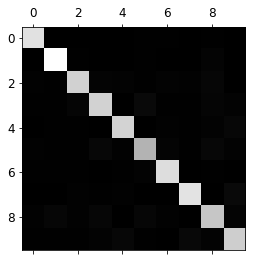

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_plot_barra


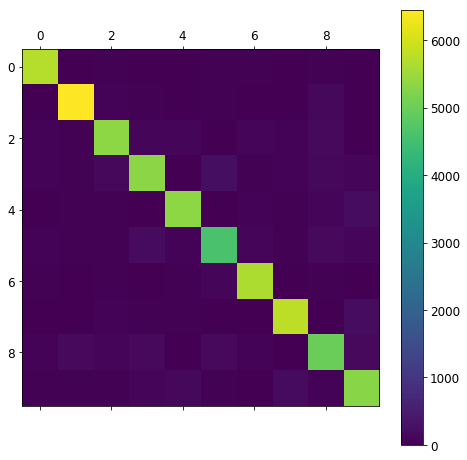

In [115]:
plot_confusion_matrix(conf_mx) # matriz de confusión con barra de colores
save_fig("confusion_matrix_plot_barra", tight_layout=False)

In [116]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums #normalizar por muestras por clase para calcular como porcentaje

Saving figure confusion_matrix_errors_plot


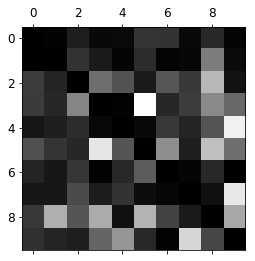

In [117]:
np.fill_diagonal(norm_conf_mx, 0) # resaltar errores, diagonal se omite
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


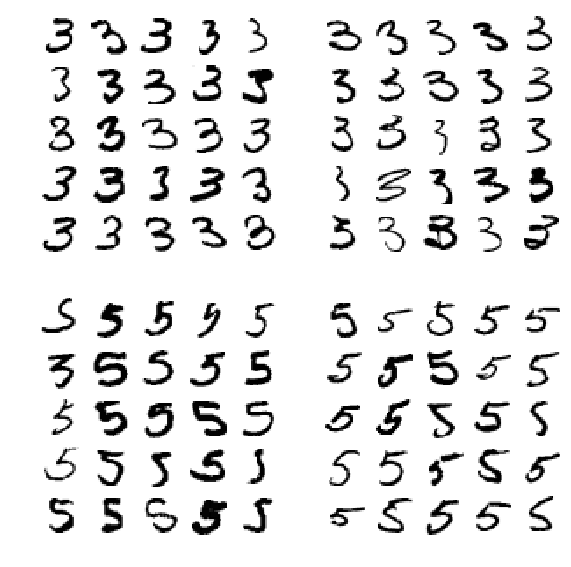

In [118]:
cl_a, cl_b = 3, 5 #analizar errores puntuales
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 3 como 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 3 como 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 5 como 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 5 como 5

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Clasificación multi-etiqueta (cada etiqueta es binaria)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # digito mayor o igual a 7
y_train_odd = (y_train % 2 == 1) # digito impar
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Warning**:La siguiente celda puede ser costosa de calcular (puede tardar horas depiendo del hardware)

In [74]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97709078477525

# Clasificación multi-salida -> extensión de multietiqueta a multicalse

In [124]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


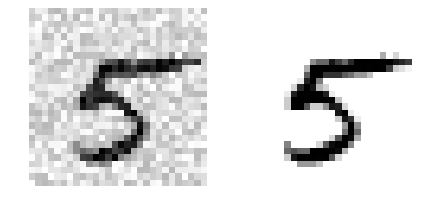

In [125]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


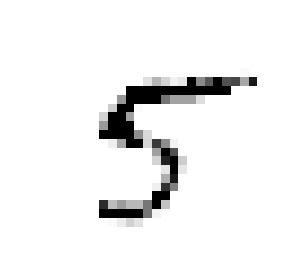

In [126]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Material extra

## Dummy clasificador aleatorio

In [78]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

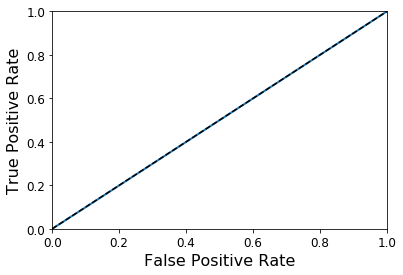

In [79]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## Clasificador KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [81]:
y_knn_pred = knn_clf.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

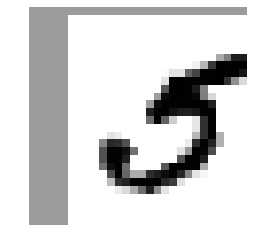

In [83]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [84]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [85]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [86]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [87]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [88]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.       , 0.       , 0.5053645, 0.       , 0.       , 0.       ,
        0.       , 0.4946355, 0.       , 0.       ]])

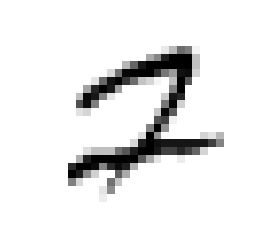

In [89]:
plot_digit(ambiguous_digit)

In [160]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="liblinear", random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 94.90%
Recall: 97.89%
